In [14]:
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from fpex0 import fpex0
from fpex0.example.exampleSetup import exampleSetup, importExampleMeasurements

In [15]:
def tol_grid(Grid, tol1, tol2):
    return

def experiment():
    """
    Modified version of exampleFit() for numerical experiments with explicit integration methods.

    ## Returns 
    Collected simulations.
    """
    # make example setup
    print("Creating an example setup.")
    FPEX0setup = exampleSetup('BDF')
    exp_data = []

    # modify grid here
    pass
    

    # import the example data
    print("Importing example data.")
    FPEX0setup = importExampleMeasurements(FPEX0setup, gridskip=2)

    # modify some configuration (as example)
    print("Setting integration options.")
    FPEX0setup.Integration.options["rtol"] = 1e-8
    FPEX0setup.Integration.options["atol"] = 1e-14

    # fitting
    print("\nSolving the fitting problem:")
    refTime = time.time()
    fit = fpex0.fit(FPEX0setup, sol_info=exp_data)
    duration = time.time() - refTime
    print("Fit complete.")
    print(f"Fit time: {duration}s.")
    print(f"Solution found: p = {fit.x}")

    return exp_data


def process_sim(sim, grid):
    if sim[0].success:
        data = {}
        sol = sim[0]
        data["duration"] = sim[1]
        data["y_cont"] = sol.sol
        data["t"] = sol.t
        data["y"] = sol.y
        data["steps"] = [sol.t[i+1] - sol.t[i] for i in range( len(sol.t)-1 )]
        data["fun_evals"] = sol.nfev
        data["grid"] = grid
    return data


def visualize_result(data):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2)
    
    # simulation: initial distribution
    init_distr = data["y_cont"](0)
    grid = data["grid"]
    # " plt1, = " to unpack a one-element tuple
    plt1, = ax1.plot(grid, init_distr, label="y(0)")
    ax1.legend()

    # time steps
    time = data["t"]
    steps = data["steps"]
    ax2.set_yscale("log")
    ax2.grid(True)
    plt2, = ax2.plot(time[:len(steps)], steps, label="Integration steps")
    ax2.legend()

    # time steps, zoomed in
    time_zoomed = np.extract(time <= 1.0, time)
    ax4.set_yscale("log")
    ax4.grid(True)
    plt4, = ax4.plot(time_zoomed, steps[:len(time_zoomed)], label="Integration steps")
    ax4.legend()

    # delta y
    deriv = [data["y"][i+1][0] - data["y"][i][0] for i in range( len(data["y"])-1 )]
    plt3, = ax3.plot(grid[:len(deriv)], deriv, label="Delta y")
    ax3.legend()

    # simulation: animated
    sim, = ax5.plot(grid, data["y_cont"](0), label="y(t)")
    ax5.legend()

    # histogram, steps
    plt6 = ax6.hist(time, bins=20, edgecolor="black", label="Steps by interval")[0]
    ax6.grid(True)
    ax6.legend()

    nframes = 60
    ani_interval = 30
    # anim_data = data["y_cont"](np.linspace(0,20, nframes))
    def update(frame):
        x = grid
        y = data["y_cont"](20*frame/nframes)
        sim.set_data(x, y)
        return plt1, plt2, plt3, plt4, sim, plt6

    ani = animation.FuncAnimation(fig, update, frames=nframes, interval=ani_interval)

    plt.show()
    print(ani)

In [16]:
sim_data = experiment()

Creating an example setup.
Importing example data.
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_0.60.json
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_1.25.json
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_2.50.json
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_5.00.json
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_10.00.json
    /home/mstrik/software/fpex0-project/fpex0_python/fpex0/example/ID407-rate_20.00.json
Setting integration options.

Solving the fitting problem:
Running lsq.

Simulate: 0.108s
Simulate: 0.027s
Simulate: 0.032s
Simulate: 0.025s
Simulate: 0.022s
Simulate: 0.027s
Simulate: 0.041s
Simulate: 0.048s
Simulate: 0.031s
Simulate: 0.037s
Simulate: 0.037s
Simulate: 0.041s
Simulate: 0.026s
Simulate: 0.029s
Simulate: 0.023s
Simulate: 0.022s
Simulate: 0.048s
Simulate: 0.064s
Simulate: 0.045s
   Iteration     Total 

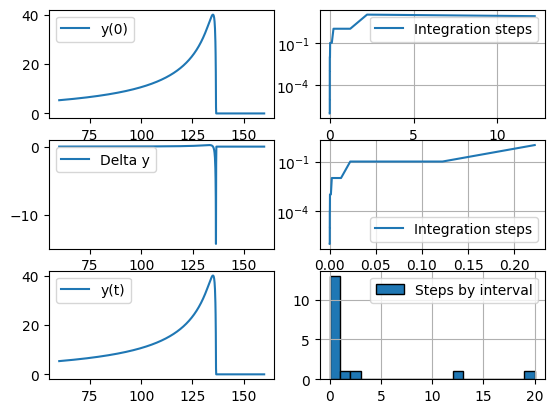

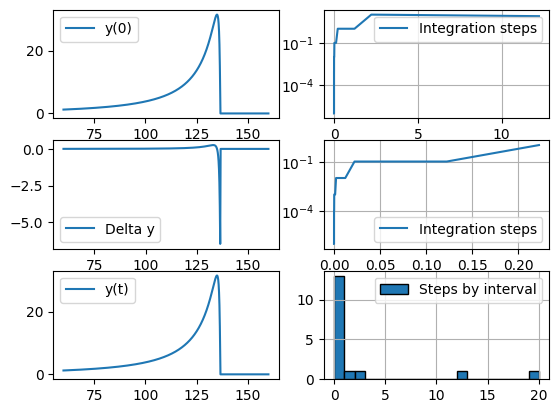

In [17]:
grid = np.linspace(60, 160, 1001)
data = [process_sim(sim, grid) for sim in sim_data]
data1 = data[0]
data2 = data[21]
#data3 = data[41]
visualize_result(data1)
visualize_result(data2)
#visualize_result(data3)

The stepsizes start very small and then reach a rather constant behaviour quickly. This is coherent with what we expected.
In the plot it does not become clear how many these very small steps are. A histogram divided in time intervals will give information about that.

In [18]:
a = len(np.extract(data1["t"]<=1, data1["t"]))
b = len(np.extract(data1["t"]<=2, data1["t"]))
print(a)
print(b-a)

13
1


In [19]:
y = data1["y_cont"]
print(y(0))
print(y(4))

[5.35440615 5.36159063 5.36879177 ... 0.         0.         0.        ]
[5.35440615 5.36159063 5.36879177 ... 0.         0.         0.        ]
